# Join LUCAS 2018 and 2022 for 2018-2022 time-series

In [4]:
import geopandas as gpd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import os
import glob

In [5]:
load_dotenv()
LUCAS = os.getenv('LUCAS')
files = glob.iglob(f"{LUCAS}/*2018_eo4bk.gpkg")
# gdfs = (gpd.read_file(file, layer = 'hd_data') for file in files )
gpkg18_dict = {}
for file in files:

    # basename: returns the basename of the pathname path: e.g., basename(foo/bar.exe) --> 'bar.exe'
    # splitext: splits the pathname into pair (root, ext): e.g., splitext(bar.exe) --> ('bar','.exe)
    # index to avoid brakets 
    key = os.path.splitext(os.path.basename(file))[0]

    # Read the geopackage as geodataframe
    gdf = gpd.read_file(file, layer='hd_data')
    
    # stores the geodataframes in dictionary, for each key
    gpkg18_dict[key] = gdf


files = glob.iglob(f"{LUCAS}/*2022_eo4bk.gpkg")
gpkg22_dict = {}
for file in files:

    # basename: returns the basename of the pathname path: e.g., basename(foo/bar.exe) --> 'bar.exe'
    # splitext: splits the pathname into pair (root, ext): e.g., splitext(bar.exe) --> ('bar','.exe)
    # index to avoid brakets 
    key = os.path.splitext(os.path.basename(file))[0]

    # Read the geopackage as geodataframe
    gdf = gpd.read_file(file, layer='hd_data')
    
    # stores the geodataframes in dictionary, for each key
    gpkg22_dict[key] = gdf

In [6]:
gpkg18_22_dict = {} 

for keysnbr in range(0,len(gpkg18_dict.keys())):
    if sorted(list(gpkg22_dict.keys()))[keysnbr].removesuffix('_2022_eo4bk') == sorted(list(gpkg18_dict.keys()))[keysnbr].removesuffix('_2018_eo4bk'):

        key = sorted(list(gpkg22_dict.keys()))[keysnbr].removesuffix('_2022_eo4bk')

        overlayed = gpd.overlay(gpkg18_dict[f'{key}_2018_eo4bk'], gpkg22_dict[f'{key}_2022_eo4bk'], how = 'intersection')

        gpkg18_22_dict[key] = overlayed


In [7]:
for key in gpkg18_22_dict.keys():

    gpkg18_22_dict[key] = gpkg18_22_dict[key].rename(columns = {'point_id_1':'point_id',
                                                    'nuts0_1':'nuts0',
                                                    'nuts1_1':'nuts1',
                                                    'nuts2_1':'nuts2',
                                                    'nuts3_1':'nuts3',
                                                    'survey_date_1':'survey_date_2018',
                                                    'survey_year_1':'survey_year_2018',
                                                    'survey_date_2': 'survey_date_2022',
                                                    'survey_year_2': 'survey_year_2022',
                                                    'lc1_1':'lc1_2018',
                                                    'lc2_1':'lc2_2018',
                                                    'lc3_1':'lc3_2018',
                                                    'lc1_spec_1':'lc1_spec_2018',
                                                    'lc2_spec_1':'lc2_spec_2018' ,
                                                    'lc_eo4bk_1': 'lc_eo4bk_2018',
                                                    'lc1_2':'lc1_2022',
                                                    'lc2_2':'lc2_2022',
                                                    'lc3_2':'lc3_2022',
                                                    'lc1_spec_2':'lc1_spec_2022',
                                                    'lc2_spec_2':'lc2_spec_2022' ,
                                                    'lc_eo4bk_2': 'lc_eo4bk_2022',
                                                    'survey_wm_1':'survey_wm_2018',
                                                    'survey_wm_type_1':'survey_wm_type_2018',
                                                    'survey_wm_source_1':'survey_wm_source_2018', 
                                                    'survey_wm_delivery_1':'survey_wm_delivery_2018',
                                                    'survey_wm_2':'survey_wm_2022',
                                                    'survey_wm_type_2':'survey_wm_type_2022',
                                                    'survey_wm_source_2':'survey_wm_source_2022', 
                                                    'survey_wm_delivery_2':'survey_wm_delivery_2022',
                                                    # 'survey_wm_reclaim_signs':'survey_wm_reclaim_signs_2022',
                                                    'survey_lm_crop_resid_1': 'survey_lm_crop_resid_2018',
                                                    'survey_lc_lu_special_remark_1':'survey_lc_lu_special_remark_2018',
                                                    'survey_lm_crop_resid_2':'survey_lm_crop_resid_2022',
                                                    'survey_lc_lu_special_remark_2':'survey_lc_lu_special_remark_2022'
                                                    # 'survey_inspire_unvegetated':'survey_inspire_unvegetated_2022', 
                                                    # 'survey_lm_stand_veget':'survey_lm_stand_veget_2022',
                                                    # 'survey_lm_by_veget':'survey_lm_by_veget_2022', 
                                                    # 'survey_lm_crop_resid_perc':'survey_lm_crop_resid_perc_2022'
                                                

    })
    # drop dublicates 

    gpkg18_22_dict[key] = gpkg18_22_dict[key].drop(['point_id_2','nuts0_2','nuts1_2','nuts2_2','nuts3_2','poly_area_sqm_2','poly_area_sqm_1','survey_wm_reclaim_signs','survey_inspire_unvegetated','survey_lm_stand_veget' ,'survey_lm_by_veget','survey_lm_crop_resid_perc'], axis = 1)

In [8]:
for key in gpkg18_22_dict.keys():
    gpkg18_22_dict[key]['poly_area_sqm'] = gpkg18_22_dict[key].area

In [9]:
eo4bk_class_outputpath = '/net/projects/EO4BK/WP1/P1-EO4BK/scripts/EO4BK-WP1-P1/eo4bksentleslim/'


names_list = list(gpkg18_22_dict.keys())

for name in names_list:
    hd_gdf = gpkg18_22_dict.get(f"{name}")
    if hd_gdf is not None:
        hd_gdf.to_file(f"{eo4bk_class_outputpath}/{name}_201822_eo4bk.gpkg", driver='GPKG', layer='hd_data')



<Axes: >

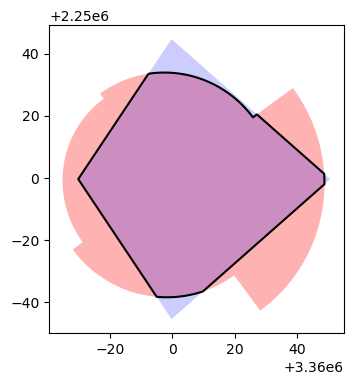

In [22]:
load_dotenv()
LUCAS = os.getenv('LUCAS')

wheat_hd_2022 = gpd.read_file(f'{LUCAS}/Wheat_2022_eo4bk.gpkg', layer = 'hd_data')
wheat_hd_2018 = gpd.read_file(f'{LUCAS}/Wheat_2018_eo4bk.gpkg', layer = 'hd_data')

wheat_2018_22 = gpkg18_22_dict['Wheat']

fig, ax = plt.subplots(figsize =(4,4)) 
wheat_hd_2022[wheat_hd_2022['point_id'] == '33602250'].geometry.plot(ax = ax, alpha = 0.3, color = 'red')
wheat_hd_2018[wheat_hd_2018['point_id'] == '33602250'].geometry.plot(ax = ax, alpha = 0.2, color = 'blue')
wheat_2018_22[wheat_2018_22['point_id'] == '33602250'].boundary.plot(ax = ax, color = 'black')